In [118]:
import cv2
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [107]:
img=cv2.imread('test_data/cristiano.jpg')
img.shape

(256, 197, 3)

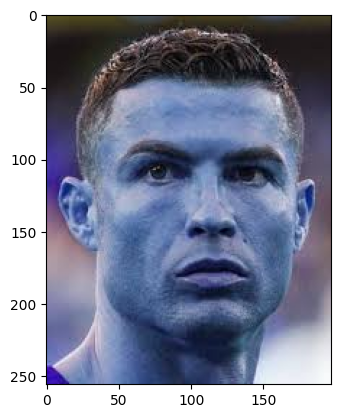

In [108]:
plt.imshow(img)
plt.show()

In [109]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

array([[ 71,  71,  71, ...,  60,  60,  60],
       [ 70,  70,  70, ...,  59,  59,  59],
       [ 68,  68,  67, ...,  57,  57,  57],
       ...,
       [ 61,  63,  68, ..., 250, 250, 250],
       [ 67,  70,  73, ..., 250, 250, 250],
       [ 69,  70,  72, ..., 250, 250, 250]], dtype=uint8)

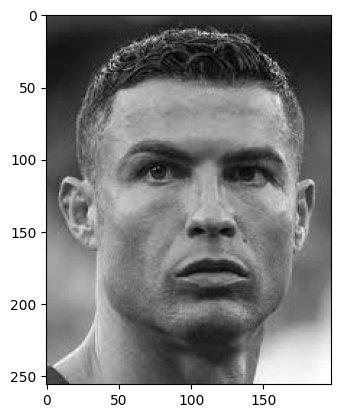

In [110]:
plt.imshow(gray,cmap='gray')
plt.show()

In [111]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.9, 3)
faces

array([[ 29,  44, 165, 165]])

In [112]:
x,y,w,h=faces[0]

In [113]:
x,y,w,h

(29, 44, 165, 165)

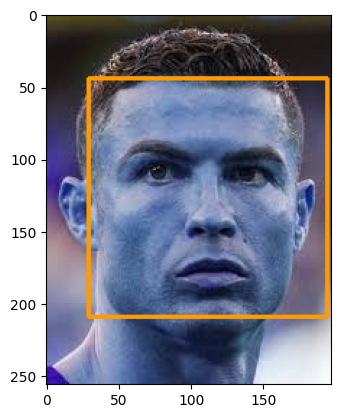

In [114]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,155,0),2)
plt.imshow(face_img)
plt.show()

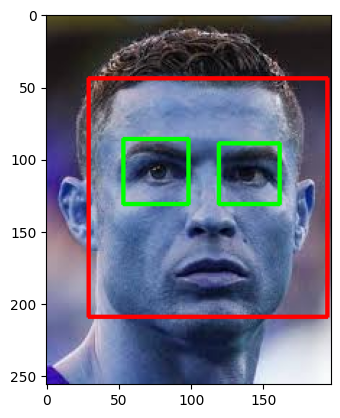

In [115]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

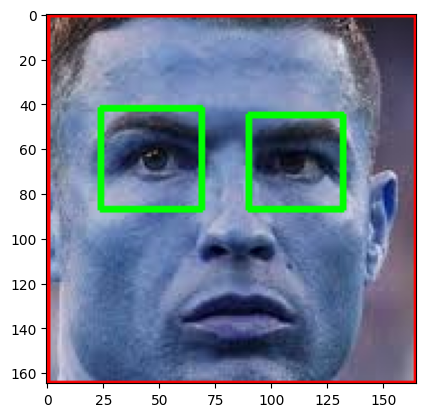

In [116]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [119]:
crop_img=np.array(roi_color)
crop_img.shape

(165, 165, 3)

In [138]:
import pywt
def py2dec(img,mode='haar',level=1):
    iArray=img
    iArray=cv2.cvtColor(iArray,cv2.COLOR_BGR2GRAY)
    iArray=np.float32(iArray)
    iArray/=255
    coff=pywt.wavedec2(iArray,mode,level=level)
    coff_h=list(coff)
    coff_h[0]*=0
    iArray_img=pywt.waverec2(coff_h,mode)
    iArray_img*=255
    iArray_img_f=np.uint8(iArray_img)
    return iArray_img_f

In [139]:
py2dec(img)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [  1,   3,   1, ...,   0,   0,   0],
       [254,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)

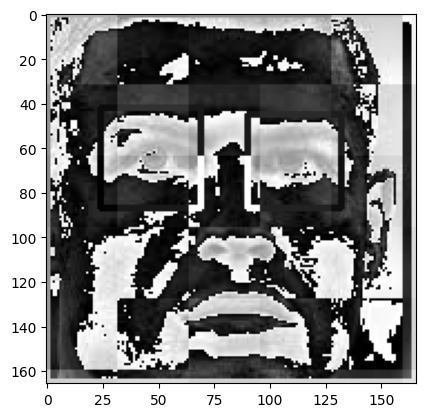

In [140]:
im_har = py2dec(crop_img,'db1',5)
plt.imshow(im_har, cmap='gray')

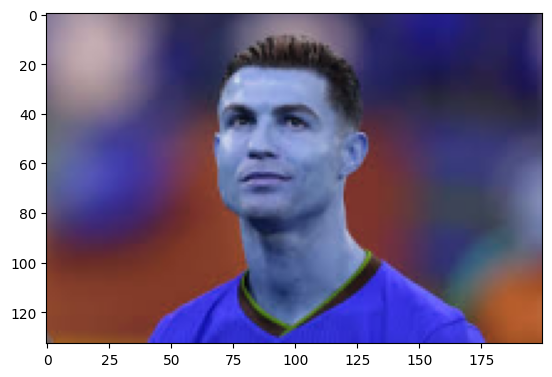

In [511]:
import cv2

def resize_image(image, width=300 ,height=100):
    """
    Resize the image to a specified width or height while maintaining aspect ratio.
    """
    h, w = image.shape[:2]
    
    if width is not None:
        # Calculate the new height maintaining the aspect ratio
        r = width / float(w)
        dim = (width, int(h * r))
    elif height is not None:
        # Calculate the new width maintaining the aspect ratio
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        # If neither width nor height is specified, return the original image
        return image
    
    # Resize the image
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

# Example usage
image = cv2.imread('test_data/download.jpg')
resized_image = resize_image(image, width=200,height=90)  # Resize to width of 800 pixels
plt.imshow(resized_image)
# plt.imshow(image)

In [548]:
def detect_faces_dynamic(image):
    image=resize_image(image, width=600,height=800)
    # Dynamically set minSize based on image size
    min_size = (int(image.shape[1] * 0.1), int(image.shape[0] * 0.1))  # 10% of image size
    height, width = image.shape[:2]
    # Dynamically set scaleFactor and minNeighbors
    if height > 1000 or width > 1000:  # Large image sizes (e.g., high resolution)
        scale_factor = 1.2
    elif height < 500 or width < 500:  # Smaller images (e.g., low resolution)
        scale_factor = 1.05
    else:  # Standard images
        scale_factor = 1.1
                    # A common starting point
    min_neighbors = 5  # Adjust based on your dataset
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)
    
    return faces


In [622]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detect_faces_dynamic(gray)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

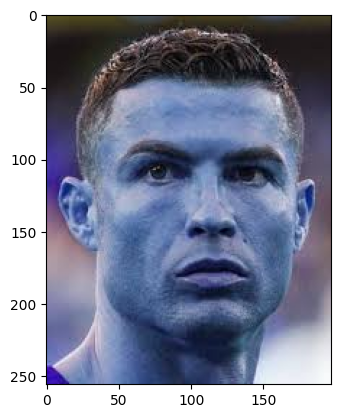

In [623]:
img=cv2.imread('test_data/cristiano.jpg')
plt.imshow(img)
plt.show()

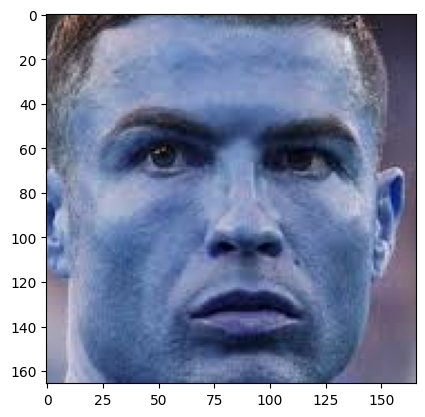

In [624]:
cropped_image = get_cropped_image_if_2_eyes('test_data/cristiano.jpg')
plt.imshow(cropped_image)

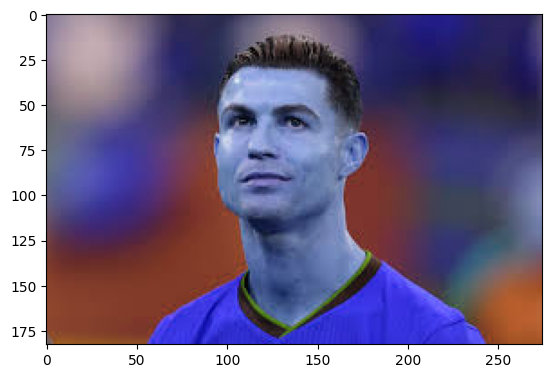

In [625]:
img2=cv2.imread('test_data/download.jpg')
plt.imshow(img2)

numpy.ndarray

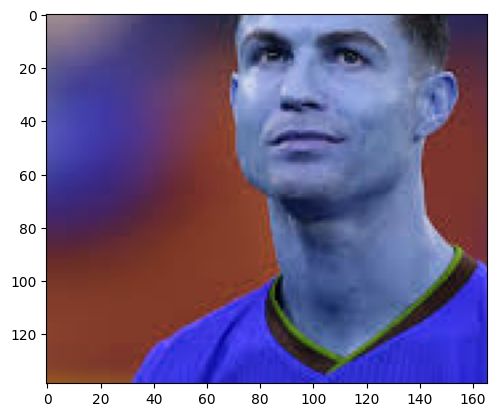

In [626]:
cropped_img2=get_cropped_image_if_2_eyes('test_data/download.jpg')
plt.imshow(cropped_img2)
type(cropped_img2)

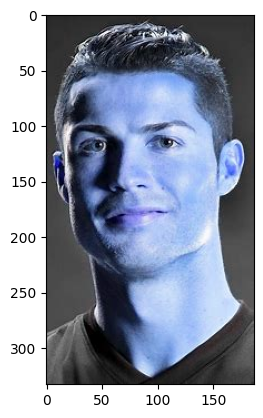

In [554]:
img3=cv2.imread('test_data/OIP (4).jpg')
plt.imshow(img3)

numpy.ndarray

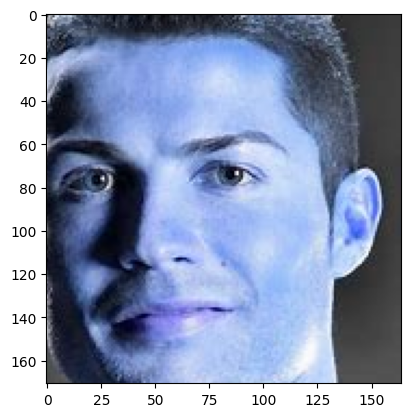

In [556]:
cropped_3=get_cropped_image_if_2_eyes('test_data/OIP (4).jpg')
plt.imshow(cropped_3)
type(cropped_3)

In [657]:
path_to_data = "assets/data/"
path_to_cr_data = "assets/data/cropped/"

In [664]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [665]:
img_dirs

['assets/data/cristiano', 'assets/data/cropped', 'assets/data/viratKohli']

In [662]:
import shutil
import os
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [666]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        # print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  assets/data/cropped/cristiano
Generating cropped images in folder:  assets/data/cropped/viratKohli


In [667]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano': ['assets/data/cropped/cristiano\\cristiano1.png',
  'assets/data/cropped/cristiano\\cristiano2.png',
  'assets/data/cropped/cristiano\\cristiano3.png',
  'assets/data/cropped/cristiano\\cristiano4.png',
  'assets/data/cropped/cristiano\\cristiano5.png',
  'assets/data/cropped/cristiano\\cristiano6.png',
  'assets/data/cropped/cristiano\\cristiano7.png',
  'assets/data/cropped/cristiano\\cristiano8.png',
  'assets/data/cropped/cristiano\\cristiano9.png'],
 'viratKohli': ['assets/data/cropped/viratKohli\\viratKohli1.png',
  'assets/data/cropped/viratKohli\\viratKohli2.png',
  'assets/data/cropped/viratKohli\\viratKohli3.png',
  'assets/data/cropped/viratKohli\\viratKohli4.png']}

In [669]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano': 0, 'viratKohli': 1}

In [672]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = py2dec(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [673]:
len(X[0])

4096

In [675]:
len(y)

13

In [676]:
X[0]

array([[133],
       [133],
       [133],
       ...,
       [253],
       [250],
       [  0]], dtype=uint8)

In [677]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(13, 4096)

In [687]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

In [680]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [688]:
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [689]:
pipe=Pipeline([('scale',StandardScaler()),('svc',SVC(kernel='rbf',max_iter=10))])

In [690]:
pipe.fit(train_x,train_y)

C:\Users\ridde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scale', StandardScaler()), ('svc', SVC(max_iter=10))])

In [691]:
pipe.score(test_x,test_y)

0.5

In [693]:
test_y[0]

1

In [692]:
test_x[0]

array([255., 255., 255., ..., 241., 240., 228.])

In [695]:
pipe.predict([test_x[0]])

array([0])

In [697]:
class_dict

{'cristiano': 0, 'viratKohli': 1}